**QUESTION 1**

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

Explore and look through the data

In [2]:
df = pd.read_csv('/Users/Emily/Downloads/Shopify.csv')

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [7]:
statistics.mean(df['order_amount'])

3145.128

Data Distributions

<AxesSubplot:>

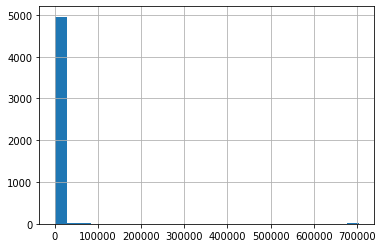

In [8]:
df['order_amount'].hist(bins = 25)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcd26388760>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcd26388dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcd26388310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcd26397520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcd263978b0>],
 'means': []}

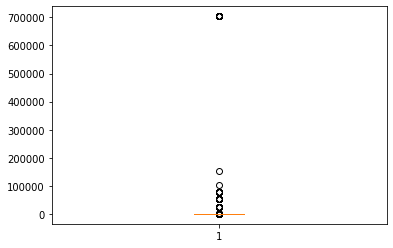

In [9]:
plt.boxplot(df['order_amount'])

**What could be going wrong with our calculation?**
<br>There are a few outliers--very large purchases-- in the data that are skewing the average order value. As you can see from the histogram and boxplot above, most of the orders are very small. However, there are a couple of orders that are very large, which is causing a right skew in the distribution.

**What is a better way to evaluate this data?** 
<br>To better evaluate this data, I would remove the outliers' influence. Outliers are defined as data points that differ significantly from most observations. To identify the outliers, we want to find the data points that are less than the lower bound and greater than the upper bound of a box plot. 

IQR = Q3 - Q1 
<br>lower bound = Q1 - (IQR * 1.5), where Q1 is the 25th percentile
<br>upper bound = Q3 + (IQR * 1.5), where Q3 is the 75th percentile

Once we identify the outliers, we want to remove them from the data and then recalculate the average order value (AOV)

**What metric would you report for this dataset?**
<br>The AOV without the outliers is what I will report. However, if removing data is not preferred, another metric could be to use the median which is more robust to outliers.

In [12]:
#Find percentiles
q1 = np.percentile(df.loc[:,'order_amount'], 25)
q3 = np.percentile(df.loc[:, 'order_amount'], 75)
print('25th Percentile (Q1): ', q1)
print('75th Percentile (Q3): ', q3)

#Calculate lower and upper bound
IQR = q3-q1
mini = q1 - (IQR * 1.5)
maxi = q3 + (IQR * 1.5)

print('minimum bound: ', mini, '[This value does not make sense because monetary values cannot be negative.]')
print('maximum bound: ', maxi)

#filter the data
df_filtered = df[df['order_amount'] <= maxi]

25th Percentile (Q1):  163.0
75th Percentile (Q3):  390.0
minimum bound:  -177.5 [This value does not make sense because monetary values cannot be negative.]
maximum bound:  730.5


New Distributions

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcd210d2610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcd210d2d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcd210d2280>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcd210df370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcd210df700>],
 'means': []}

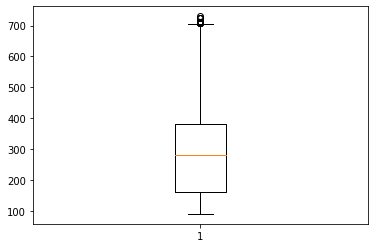

In [14]:
plt.boxplot(df_filtered['order_amount'])

<AxesSubplot:>

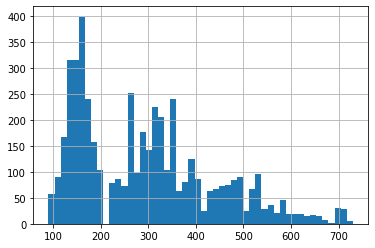

In [15]:
df_filtered['order_amount'].hist(bins = 50)

In [19]:
new_aov = statistics.mean(df_filtered['order_amount']) 

print('This is the value of the metric chose: \nAdjusted AOV: ', new_aov)
print('This is the median of the original data: ', statistics.median(df['order_amount']))
print('This is the median of the filtered data: ', statistics.median(df_filtered['order_amount']))

This is the value of the metric chose: 
Adjusted AOV:  293.7153735336489
This is the median of the original data:  284.0
This is the median of the filtered data:  280


The new adjusted AOV has a value of **293.72**
<br> Earlier, I mentioned how if data removal is not preferred, we can use the median of the data instead because it is robust to outliiers. We see that the median of the original (284) and filtered data (280) are very similar to the adjusted AOV.

**Question 2**

**How many orders were shipped by Speedy Express in total?** 54

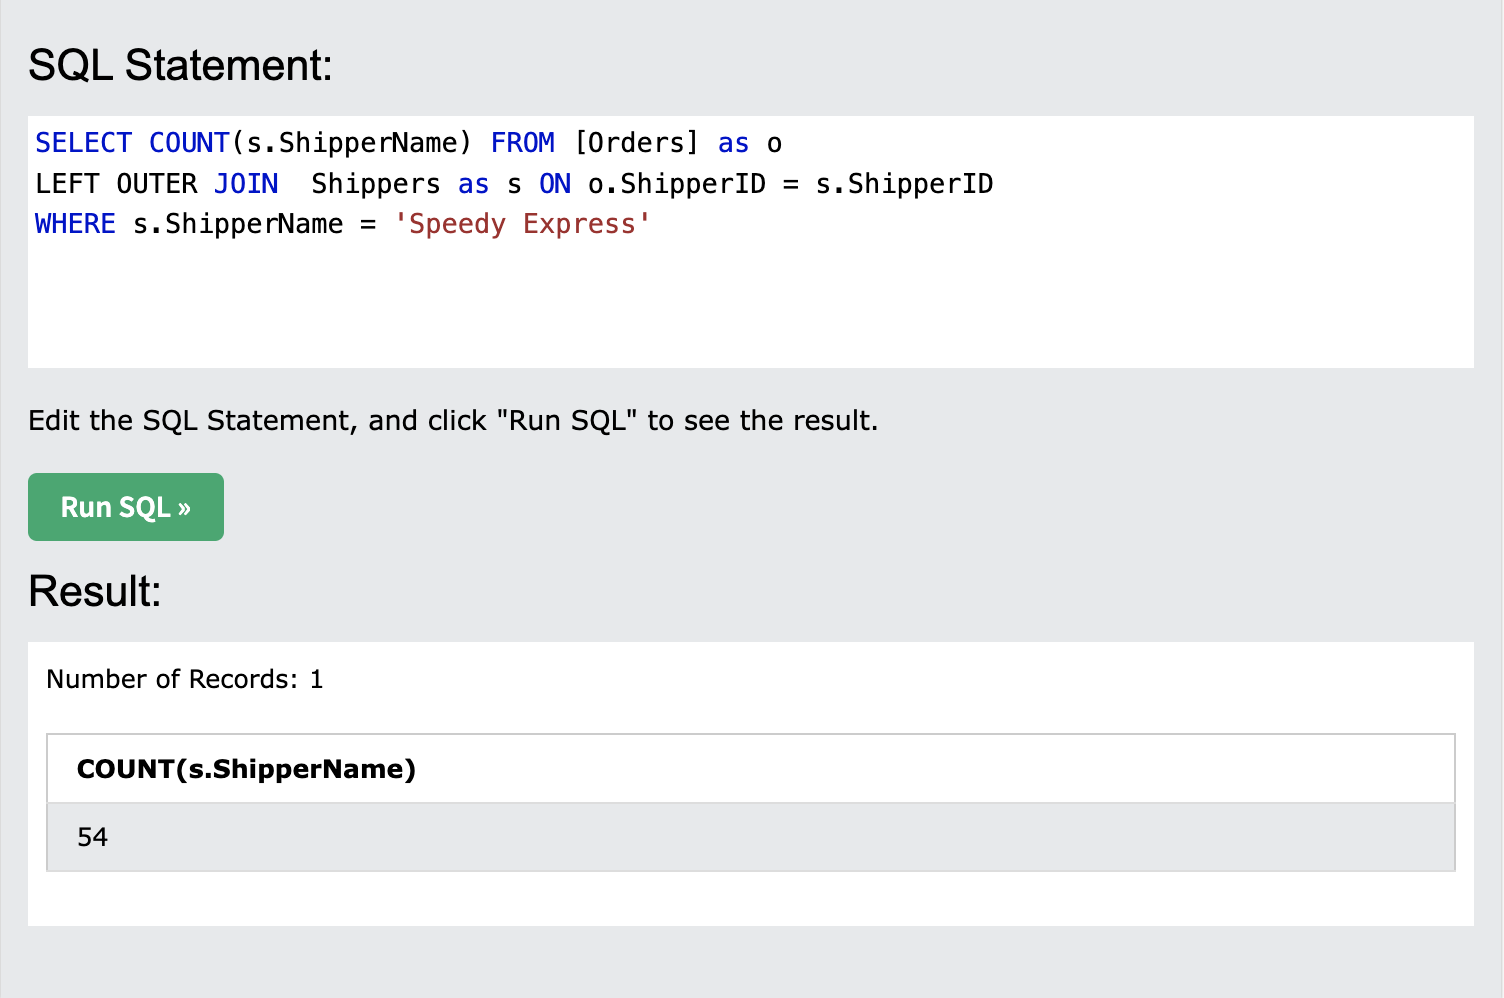

**What is the last name of the employee wiht the most orders?** Suyama

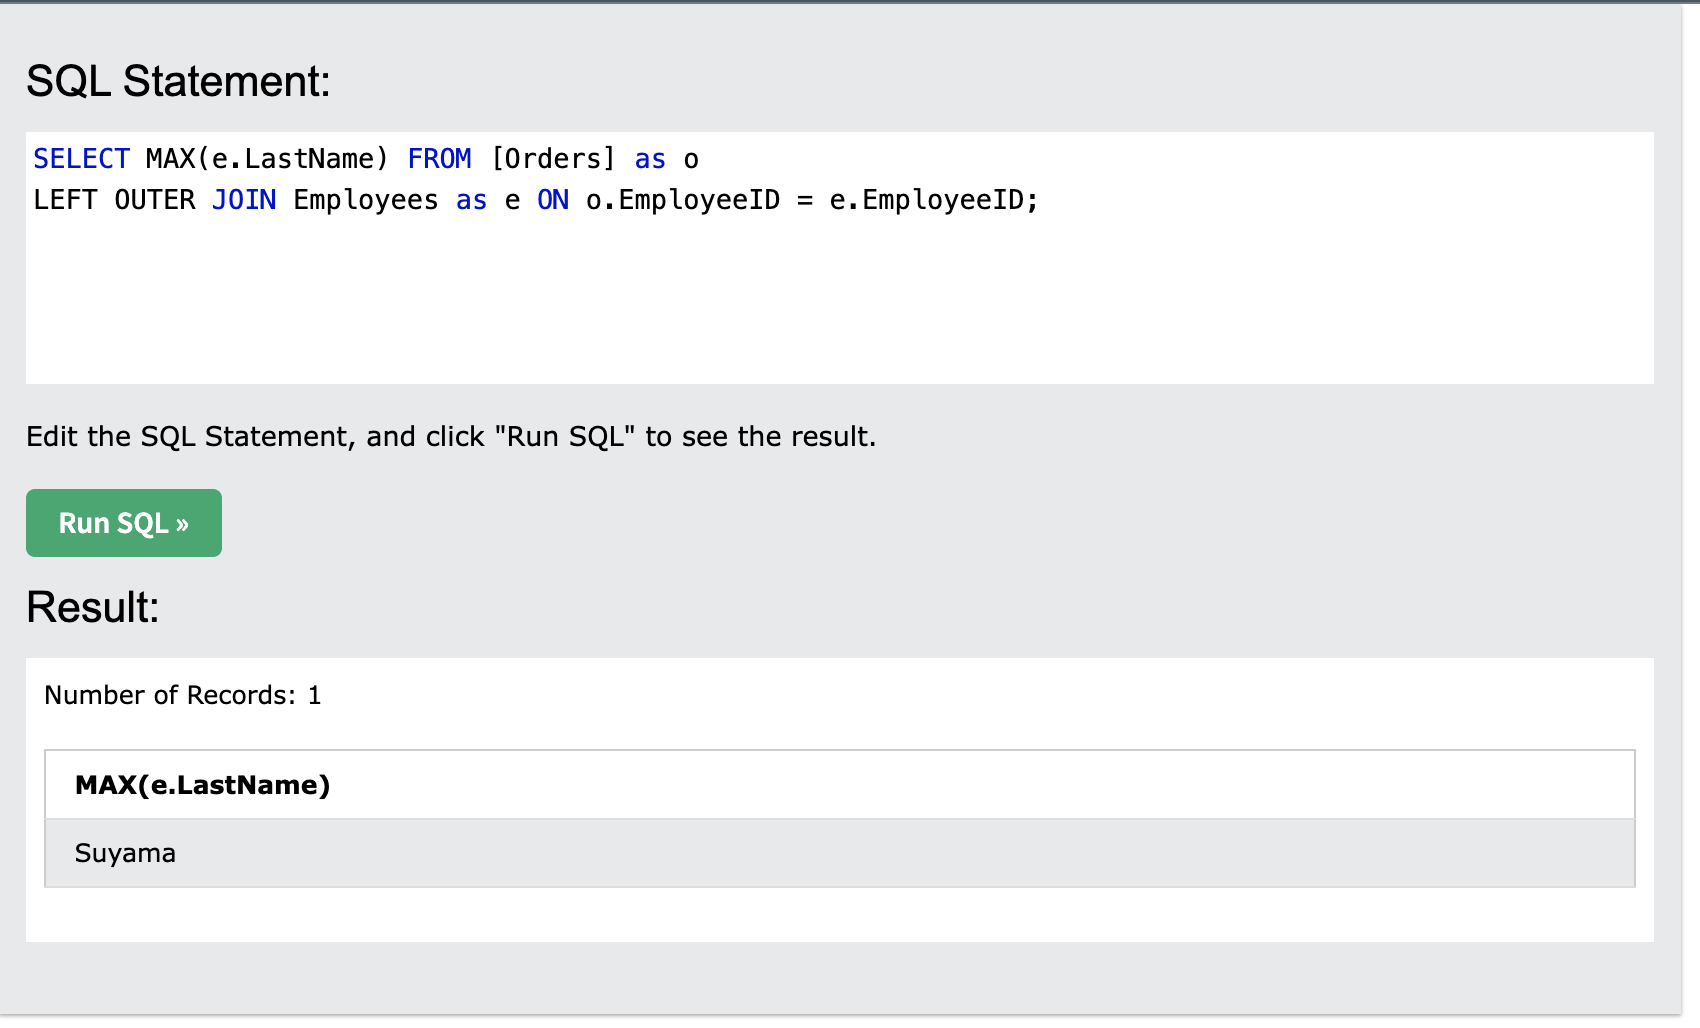

**What product was ordered by most by customers in Germany?** Zaanse koeken

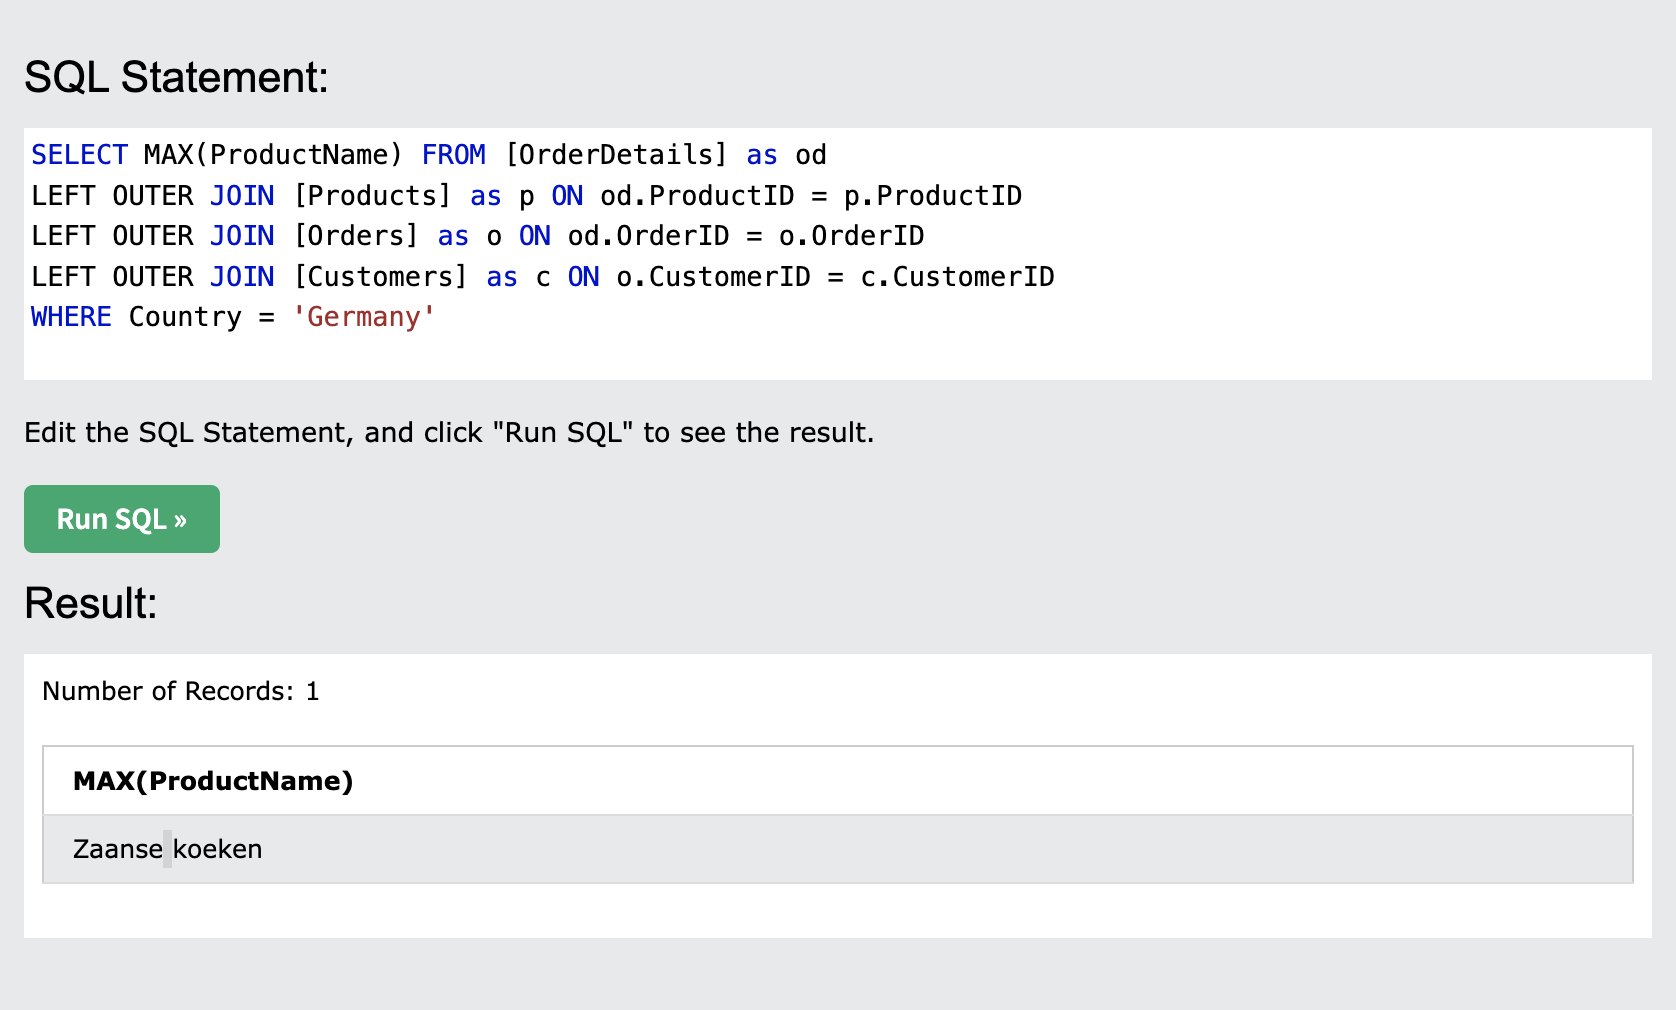